In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [3]:
df_knn = pd.read_csv("df_ocim_lsa.csv")

In [4]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Ocimene
0,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.0
1,6,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,7,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0.0
3,8,0.158467,0.230093,0.240255,-0.230257,-0.280443,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,12,0.301049,-0.056156,-0.030174,-0.036708,0.015147,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,42963,0.138986,0.152119,-0.069814,0.085212,0.076637,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
44996,42965,0.360708,-0.269375,0.169135,0.099257,0.141142,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
44997,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
44998,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [5]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [6]:
X = df_knn.drop(['X..Ocimene', 'index'], axis = 1)
y = df_knn[['X..Ocimene']]

Plotting histograms on target variable

In [7]:
y_array = y.to_numpy()
y_array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

<AxesSubplot:ylabel='Count'>

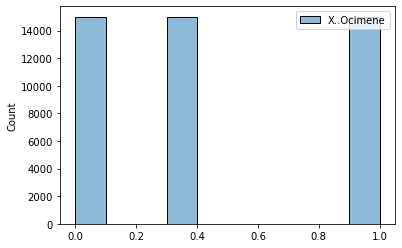

In [8]:
sns.histplot(y, bins = 10)

Train test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [10]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [11]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_knreg)

0.006376923076922678

In [13]:
mean_squared_error(y_val, y_pred_knreg)

0.0023713412228794687

In [14]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.048696418994413425

In [15]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9918390498317396

In [16]:
#val
r2_score(y_val, y_pred_knreg)

0.9862120824739362

Residual plots for each target variable

Feature Selection

In [17]:
rfreg = RandomForestRegressor()

In [18]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [19]:
selector.estimator_.feature_importances_

array([3.00336357e-03, 1.95914526e-03, 3.17306992e-03, 2.37793934e-03,
       5.85913693e-02, 3.81625288e-03, 3.45246685e-06, 1.19436502e-01,
       1.59471671e-05, 6.58468174e-05, 1.26873802e-04, 0.00000000e+00,
       1.69976192e-04, 7.50458733e-06, 4.67244598e-04, 1.13323446e-04,
       1.80226388e-04, 1.66160848e-04, 0.00000000e+00, 3.31395120e-04,
       0.00000000e+00, 0.00000000e+00, 1.28453828e-04, 7.74440472e-05,
       3.18271457e-04, 1.78022790e-04, 1.64061464e-04, 1.52685658e-06,
       0.00000000e+00, 4.40244565e-05, 4.08373764e-04, 0.00000000e+00,
       8.02453920e-04, 0.00000000e+00, 0.00000000e+00, 1.33266786e-04,
       1.06804326e-04, 1.54547200e-04, 2.46904895e-04, 5.28315619e-05,
       3.84493938e-05, 3.98280337e-04, 2.92989691e-06, 3.24188337e-04,
       1.10210109e-05, 1.14361771e-04, 4.70828073e-05, 4.26288565e-04,
       1.57201375e-02, 6.08849959e-04, 4.66264915e-04, 1.84025721e-04,
       1.79635976e-03, 4.28700420e-05, 2.42677123e-04, 7.53198893e-05,
      

In [20]:
selector.threshold_

0.011627906976744186

In [21]:
mask = selector.get_support()

In [22]:
mask

array([False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [23]:
selected_features = X.columns[mask]

In [24]:
selected_X = df_knn[selected_features]
selected_X

,lsa_4,sativa,citrus,orange,pine
0,-0.034786,0,0,0,0
1,0.041143,0,0,0,0
2,0.009215,0,0,0,0
3,-0.280443,0,0,0,0
4,0.015147,0,0,0,0
...,...,...,...,...,...
44995,0.076637,0,0,0,0
44996,0.141142,0,0,0,0
44997,0.000000,0,0,0,0
44998,0.000000,0,0,0,0


In [25]:
selected_X.columns.to_list()

['lsa_4', 'sativa', 'citrus', 'orange', 'pine']

In [26]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_ocim.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_ocim.pkl")

['selector_knn_lsa_elbow_ocim.pkl']

Train test split (after Feature Selection)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [28]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [29]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [30]:
mean_absolute_error(y_val, y_pred_knreg)

0.006272435897435508

In [31]:
mean_squared_error(y_val, y_pred_knreg)

0.002443680144641456

In [32]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.04943359328069785

In [33]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9923996235972469

In [34]:
#val
r2_score(y_val, y_pred_knreg)

0.9858108600268741

Hyperparameter Tuning

In [35]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [36]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [38]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [55]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [56]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.003983830306559683

In [57]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.039334689128559745

In [58]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9998025177810185

In [59]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9910161362406104

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [60]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [61]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_ocim.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_ocim.pkl")

['y_test_knreg_lsa_elbow_ocim.pkl']

In [62]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.003664263518421483

In [63]:
mean_squared_error(y_test, y_pred_knreg_test)

0.0012844082161442415

In [64]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.03583864138251116

In [65]:
r2_score(y_test, y_pred_knreg_test)

0.9925207289599859

In [66]:
y_test

,X..Ocimene
25275,0.346154
12561,1.000000
24707,0.346154
25066,0.346154
33429,0.346154
...,...
15262,1.000000
36801,0.346154
44919,0.000000
38317,0.346154


In [67]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

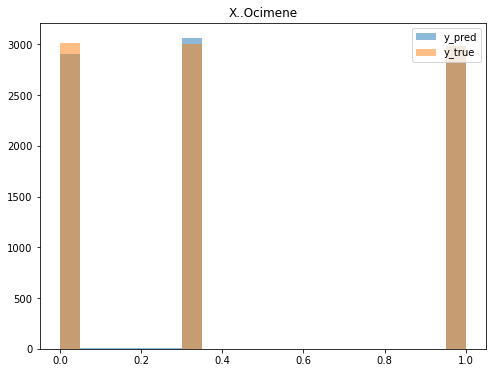

<Figure size 432x288 with 0 Axes>

In [68]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Ocimene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_ocim.png')

Pearson R

In [69]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.996
P-value: 0.000


<AxesSubplot:>

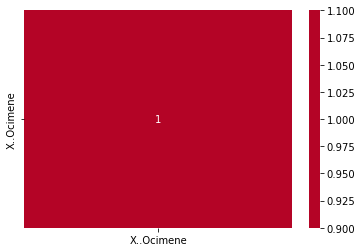

In [70]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)